<a href="https://colab.research.google.com/github/daynoh/100-Days-Of-ML-Code/blob/master/IMDB_review_sentiment_classification_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


Dataset preprocessing

In [0]:
(X_train,y_train),(X_test, y_test)=imdb.load_data(num_words = 20000)

In [4]:
# already encoded into numbers
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [0]:
X_train = pad_sequences(X_train, maxlen= 100)
X_test = pad_sequences(X_test, maxlen = 100)

In [6]:
X_train.shape

(25000, 100)

In [0]:
vocab_size = 20000
embed_size = 128

In [0]:
### Building LSTM network

### Building LSTM network


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape= (X_train.shape[1],)))
model.add(LSTM(units = 80, activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(units =1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 80)                66880     
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 2,626,961
Trainable params: 2,626,961
Non-trainable params: 0
_________________________________________________________________


In [18]:
X_train.shape

(25000, 100)

In [21]:
history = model.fit(X_train, y_train, epochs = 6,batch_size = 128, validation_data = (X_test,y_test),verbose = 1)

Epoch 1/6
196/196 [==============================] - 63s 320ms/step - loss: 0.2108 - accuracy: 0.9202 - val_loss: 0.3748 - val_accuracy: 0.8458
Epoch 2/6
196/196 [==============================] - 62s 316ms/step - loss: 0.1341 - accuracy: 0.9517 - val_loss: 0.4570 - val_accuracy: 0.8357
Epoch 3/6
196/196 [==============================] - 62s 316ms/step - loss: 0.0881 - accuracy: 0.9691 - val_loss: 0.6509 - val_accuracy: 0.8278
Epoch 4/6
196/196 [==============================] - 62s 315ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.6613 - val_accuracy: 0.8272
Epoch 5/6
196/196 [==============================] - 62s 317ms/step - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.7923 - val_accuracy: 0.8235
Epoch 6/6
196/196 [==============================] - 62s 318ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.7362 - val_accuracy: 0.8286


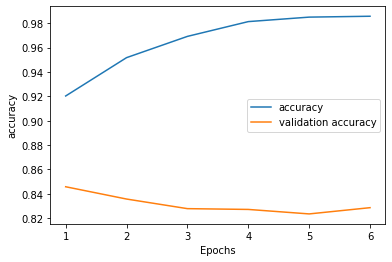

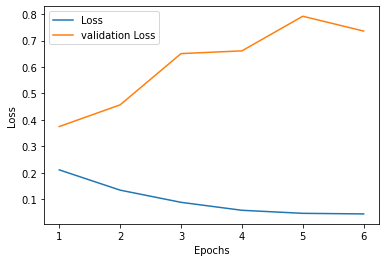

In [24]:
def plot_learning(history):
  epoch_range=range(1,7)
  plt.plot(epoch_range,history.history['accuracy'], label = 'accuracy')
  plt.plot(epoch_range,history.history['val_accuracy'], label = 'validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  plt.plot(epoch_range,history.history['loss'], label = 'Loss')
  plt.plot(epoch_range,history.history['val_loss'], label = 'validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


plot_learning(history)